# Letters

In [9]:
import glob
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

path = '/Users/ethan/Documents/GitHub/Learn-PsychoPy/Labs/Letters/data'
all_files = glob.glob(path + "/*.csv")

# assemble data from all participants into one dataframe

temp = [] # make a list to hold all the individual dataframes

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) # read in each dataframe
    df = df[df['key_resp.rt'].notna()] # remove trials with no participant response
    df.reset_index(level=0, inplace=True)
    temp.append(df) # add each dataframe to the list of dataframes

df = pd.concat(temp, axis=0, ignore_index=True) # concatenate all participants' data

In [10]:
df

,index,left,right,correctAns,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,key_resp_2.keys,key_resp_2.rt,...,key_resp.rt,ISI.started,ISI.stopped,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 26
0,1,B,A,right,0.0,0.0,0.0,1.0,NaN,NaN,...,0.473770,0.003873,None,batman,1,2020_Apr_10_1230,letters,2020.1.2,59.678944,NaN
1,2,B,A,right,0.0,1.0,1.0,1.0,NaN,NaN,...,0.335954,0.012428,None,batman,1,2020_Apr_10_1230,letters,2020.1.2,59.678944,NaN
2,3,A,B,left,1.0,0.0,2.0,0.0,NaN,NaN,...,0.368056,0.011016,None,batman,1,2020_Apr_10_1230,letters,2020.1.2,59.678944,NaN
3,4,A,B,left,1.0,1.0,3.0,0.0,NaN,NaN,...,0.331443,0.012929,None,batman,1,2020_Apr_10_1230,letters,2020.1.2,59.678944,NaN
4,5,B,A,right,2.0,0.0,4.0,1.0,NaN,NaN,...,0.332692,0.011273,None,batman,1,2020_Apr_10_1230,letters,2020.1.2,59.678944,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,196,A,B,left,97.0,1.0,195.0,0.0,NaN,NaN,...,0.318025,0.013078,None,aquaman,1,2020_Apr_10_1222,letters,2020.1.2,60.040341,NaN
396,197,A,B,left,98.0,0.0,196.0,0.0,NaN,NaN,...,0.496276,0.013012,None,aquaman,1,2020_Apr_10_1222,letters,2020.1.2,60.040341,NaN
397,198,A,B,left,98.0,1.0,197.0,0.0,NaN,NaN,...,0.315823,0.013162,None,aquaman,1,2020_Apr_10_1222,letters,2020.1.2,60.040341,NaN
398,199,B,A,right,99.0,0.0,198.0,1.0,NaN,NaN,...,0.380824,0.010672,None,aquaman,1,2020_Apr_10_1222,letters,2020.1.2,60.040341,NaN


In [11]:
left = df.loc[(df.left == 'A')]
right = df.loc[(df.right == 'A')]

#left.head(n = 10)



In [12]:
left = left['key_resp.rt'].to_numpy()
right = right['key_resp.rt'].to_numpy()

In [13]:
from scipy import stats
res = stats.ttest_rel(left, right) 
#res
print("t-statistic: ", res[0])
print("p-values: ", res[1])

t-statistic:  1.7707808073568319
p-values:  0.07812802691782504


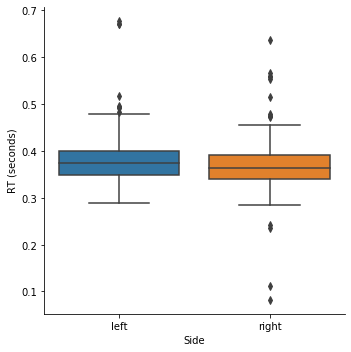

In [14]:
boxplot = sns.catplot(x="correctAns", y="key_resp.rt", kind="box", data=df, order = ['left', 'right'])
boxplot.set(xlabel='Side', ylabel='RT (seconds)')
plt.show()

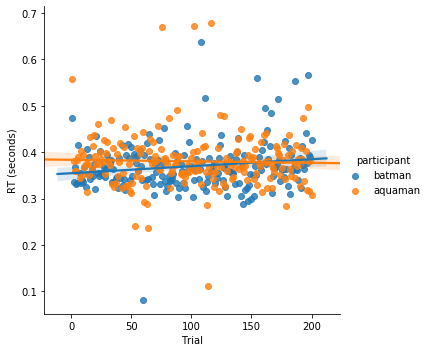

In [16]:
timing_plot = sns.lmplot(x = "index", y = "key_resp.rt", hue = "participant", data = df)
timing_plot.set(xlabel = "Trial", ylabel = "RT (seconds)")
plt.show()